## 1. Content Type Analysis: Examine the distribution of movies vs. TV shows.

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


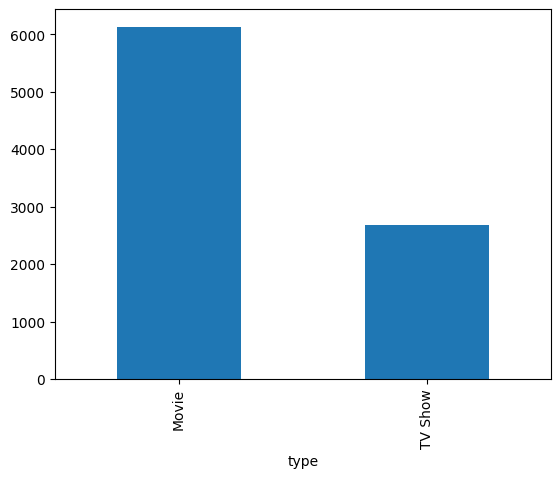

In [6]:
import pandas
import matplotlib.pyplot as plt

df = pandas.read_csv("netflix_dataset.csv")

type_distribution = df['type'].value_counts()
print(type_distribution)

type_distribution.plot(kind='bar')
plt.show()


### Patterns:
- There are significantly more movies (6131) than TV shows (2676) available in this dataset.
- The number of movies is more than double the number of TV shows, suggesting that Netflix has a stronger focus on movies in their catalog.

### Insights:
- This could indicate a content strategy that prioritizes movies, possibly due to higher demand or better viewer retention.
- It's also possible that the production and acquisition costs, along with licensing agreements, might be more favorable for movies compared to TV shows.

In [7]:
print(type_distribution)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


## Analyze trends over time in the type of content being added to Netflix

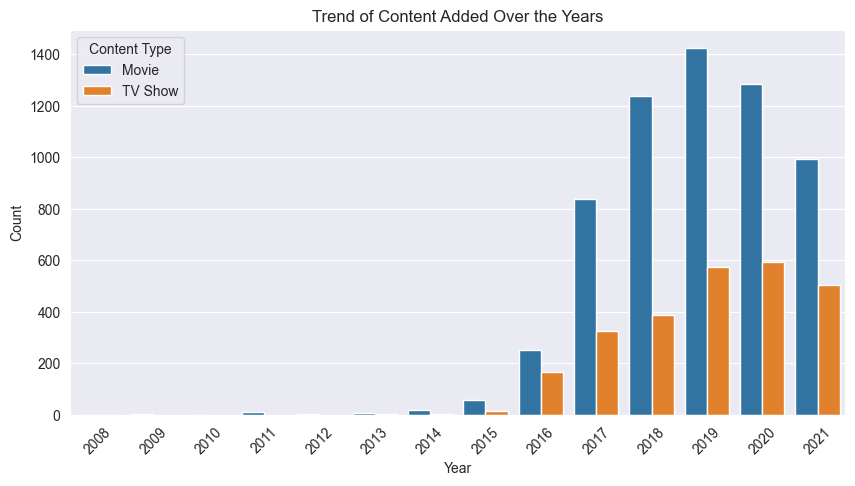

Movie Counts by Year:
year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
dtype: int64
TV Shows Counts by Year:
year_added
2008      1
2013      4
2014      4
2015     17
2016    165
2017    325
2018    388
2019    575
2020    594
2021    505
dtype: int64


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
netflix_df = pd.read_csv("netflix_dataset.csv")

netflix_df = netflix_df.dropna(subset=['date_added'])

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce')

netflix_df = netflix_df.dropna(subset=['date_added'])

netflix_df['year_added'] = netflix_df['date_added'].dt.year

plt.figure(figsize=(10, 5))
sns.countplot(x='year_added', hue='type', data=netflix_df)
plt.title('Trend of Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()

# Check duplicates
duplicate_rows = netflix_df[netflix_df.duplicated()]
#print("Duplicate Rows:")
#print(duplicate_rows)

movie_counts = netflix_df[netflix_df['type'] == 'Movie'].groupby('year_added').size()
tv_show_counts = netflix_df[netflix_df['type'] == 'TV Show'].groupby('year_added').size()

print("Movie Counts by Year:")
print(movie_counts)

print("TV Shows Counts by Year:")
print(tv_show_counts)

total_actual_movies = netflix_df['type'].value_counts()['Movie']
total_actual_tvshows = netflix_df['type'].value_counts()['TV Show']
#print("Total Movies:", total_actual_movies)
#print("Total TV Shows:", total_actual_tvshows)

### Patterns:
- There are significantly more movies than TV shows trending every year after 2008 according to the dataset.
- In 2019 the number of movies trending was maximized ( 1424).
- In 2020 the number of TV shows trending was maximized ( 594).
- The trending number of movies was growing till 2019 and then began to fall hitting 993 in 2021
- The trending number of TV shows was growing till 2020 and then began falling hitting 505 in 2021

### Insights:
- This could indicate that people prefer movies to TV shows making them more trendy each year

## 2. Release Year Analysis. Investigate the distribution of content by release year.

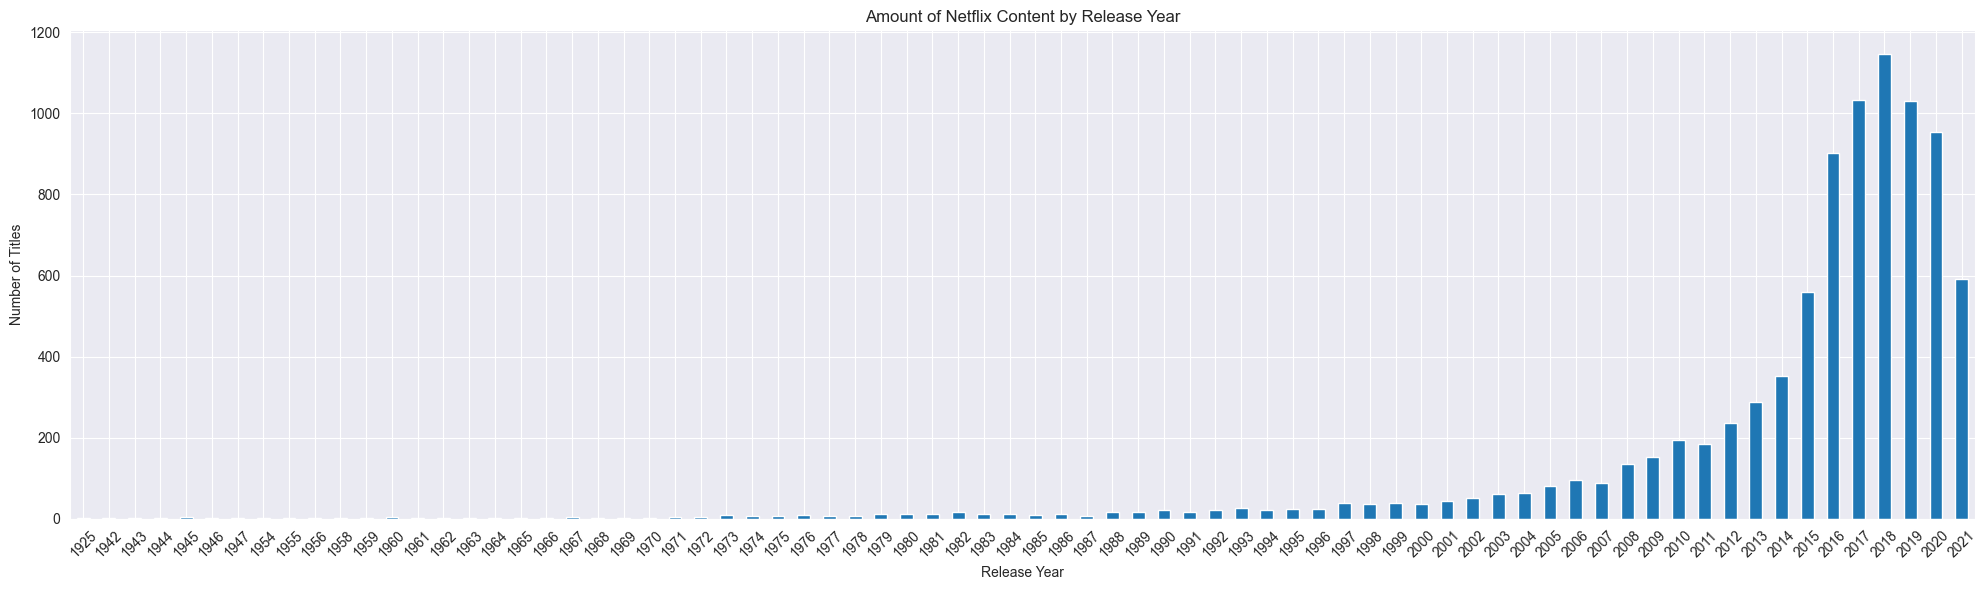

Distribution of Netflix Content by Release Year:
release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_data = pd.read_csv('netflix_dataset.csv')

plt.figure(figsize=(20, 6))
netflix_data['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Amount of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
content_distribution = netflix_data['release_year'].value_counts().sort_index()
print("Distribution of Netflix Content by Release Year:")
print(content_distribution)

Total number of movies: 6131
Total number of TV shows: 2676

Distribution of movies among years:
release_year
1925      0
1942      2
1943      3
1944      3
1945      3
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Name: count, Length: 74, dtype: int64

Distribution of TV shows among years:
release_year
1925      1
1942      0
1943      0
1944      0
1945      1
       ... 
2017    265
2018    380
2019    397
2020    436
2021    315
Name: count, Length: 74, dtype: int64


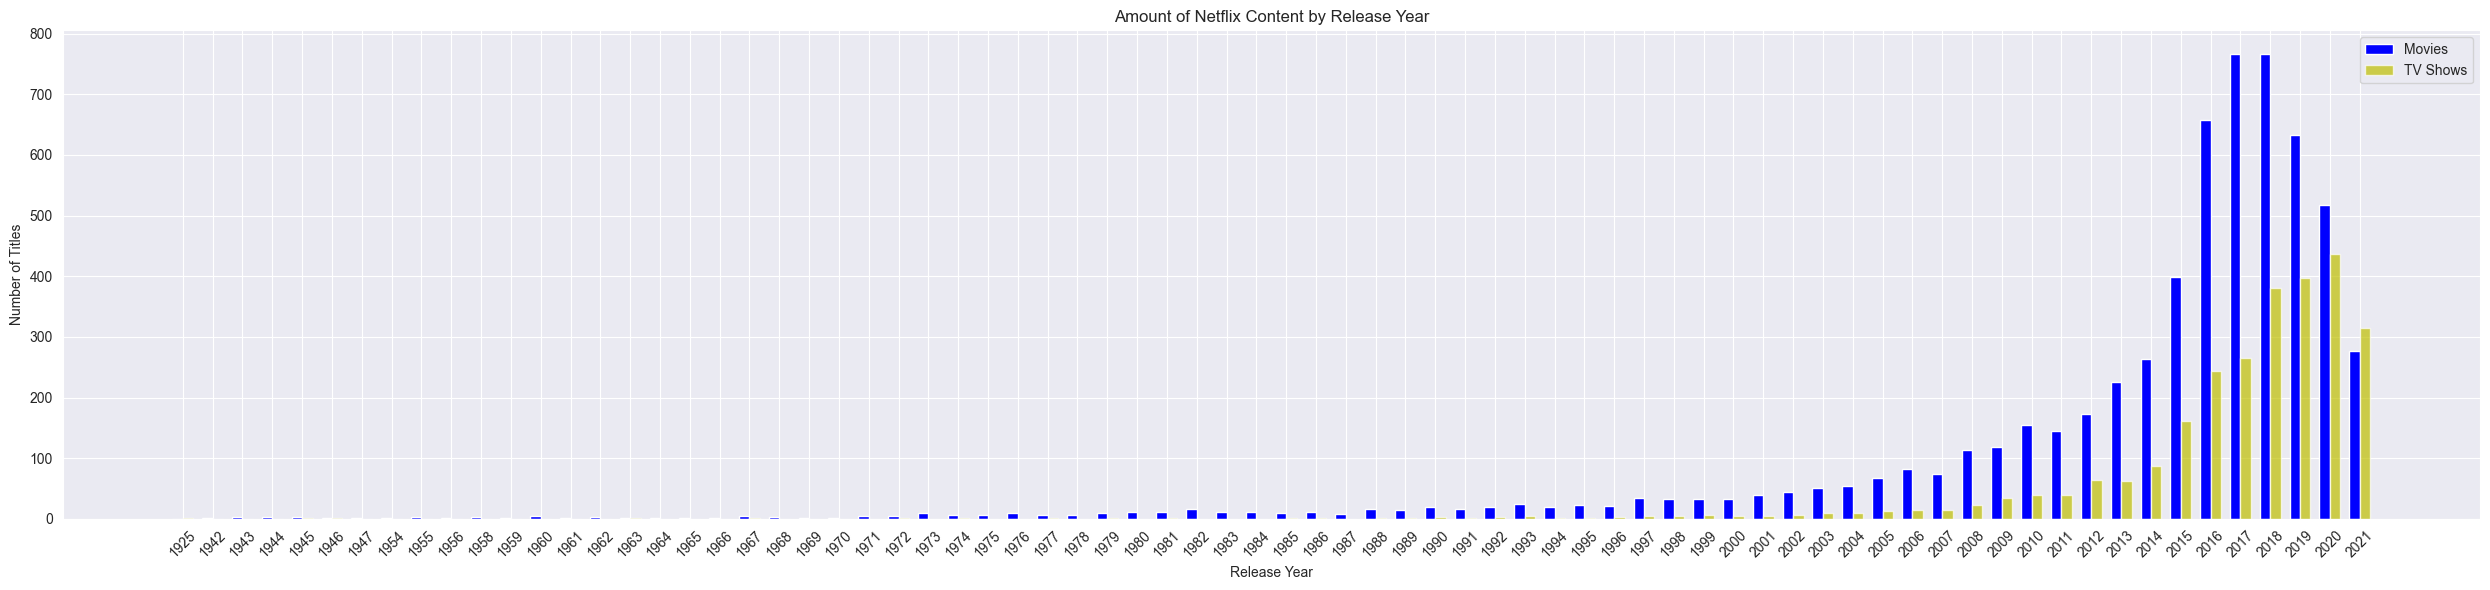

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

netflix_data = pd.read_csv('netflix_dataset.csv')

movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

movies_by_year = movies['release_year'].value_counts().sort_index()
tv_shows_by_year = tv_shows['release_year'].value_counts().sort_index()

merged_index = movies_by_year.index.union(tv_shows_by_year.index)
movies_by_year = movies_by_year.reindex(merged_index, fill_value=0)
tv_shows_by_year = tv_shows_by_year.reindex(merged_index, fill_value=0)

# Determining the width of the bars
bar_width = 0.35

years = np.arange(len(merged_index))

print("Total number of movies:", movies.shape[0])
print("Total number of TV shows:", tv_shows.shape[0])
print()

print("Distribution of movies among years:")
print(movies_by_year)
print()

print("Distribution of TV shows among years:")
print(tv_shows_by_year)
print()

plt.figure(figsize=(25, 6))

plt.bar(years - bar_width / 2, movies_by_year, bar_width, color='b', label='Movies')

plt.bar(years + bar_width / 2, tv_shows_by_year, bar_width, color='y', label='TV Shows', alpha=0.7)

plt.title('Amount of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(years, merged_index)  
plt.xticks(rotation=45)
plt.legend()  
plt.tight_layout()
plt.show()

### Patterns:
- The content was being released in relatively constantly growing amounts with years passing. But there are some overall falls in 2008, 2012 and 2019-2021 
- The distribution of movie releases was growing up to 2019 hitting pick in 2017-2018 with 767 and then beginning to fall down to 277 in 2021
- The distribution of TV Shows releases was growing up to 2021 hitting pick in 2020 with 436 releases and then falling to 315
- There have always been more movies released except for 2021 when the distribution looked like this: Movies reached only 277 and TV Shows hit 315 in releases

### Insights:
- Looking at the diagram it is possible to assume that the demand and financing was growing through the years resulting in higher overall release numbers
- Remembering the Covid times of 2020 it is logical to say that the fall in content-release of 2020 and 2021 was due to those events
- The higher release numbers of TV Shows than movies in 2021 and the falling difference between the two in earlier years lets us assume that the demand for TV Shows started overgrowing the demand for movies

## Identify trends in the production of new content over the years

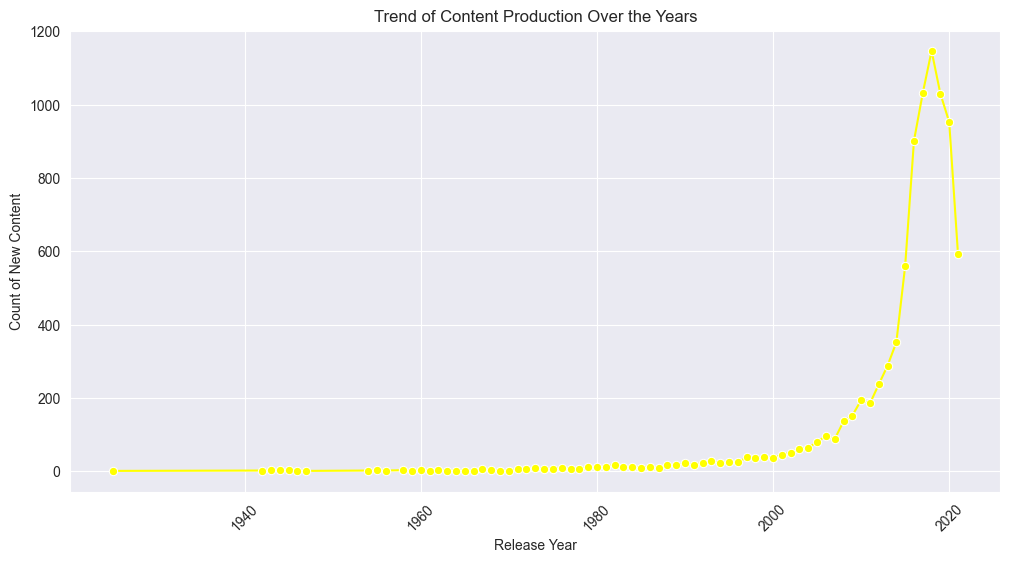

    release_year  count
0           1925      1
1           1942      2
2           1943      3
3           1944      3
4           1945      4
..           ...    ...
69          2017   1032
70          2018   1147
71          2019   1030
72          2020    953
73          2021    592

[74 rows x 2 columns]


In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

netflix_df = pd.read_csv("netflix_dataset.csv")
content_by_year = netflix_df.groupby('release_year').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='count', data=content_by_year, marker='o', color='yellow')
plt.title('Trend of Content Production Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count of New Content')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(content_by_year)

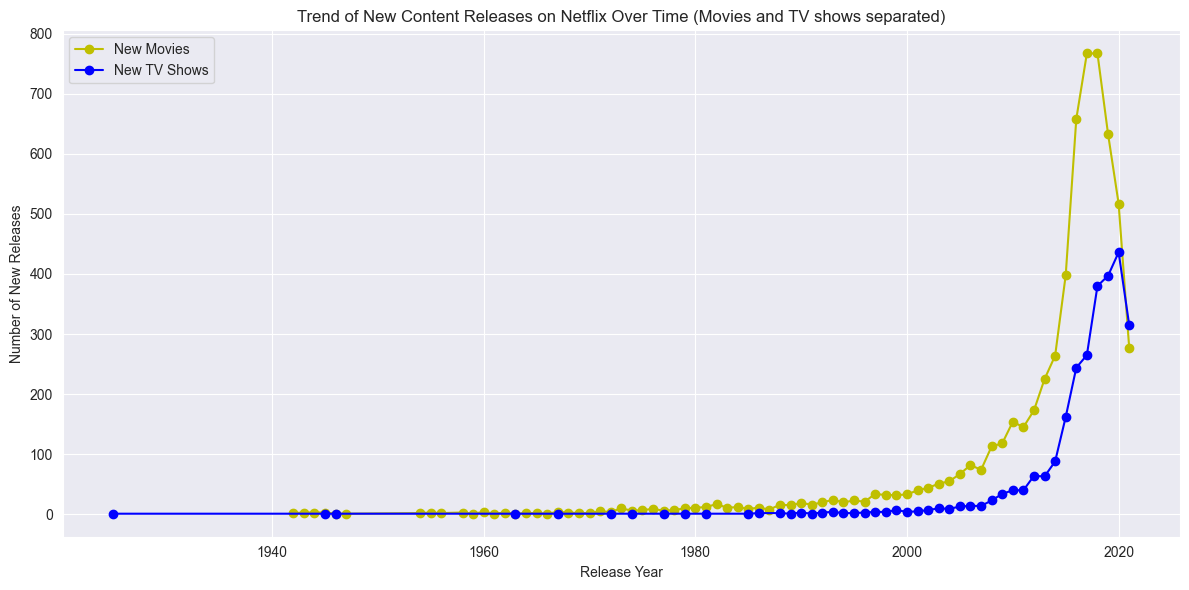

Total number of movies: 6131
Total number of TV shows: 2676

Distribution of movies among years:
release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Length: 73, dtype: int64

Distribution of TV shows among years:
release_year
1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003     10
2004      9
2005     13
2006     14
2007     14
2008     23
2009     34
2010     40
2011     40
2012     64
2013     63
2014     88
2015    162
2016    244
2017    265
2018    380
2019    397
2020    436
2021    315
dtype: int64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_data = pd.read_csv('netflix_dataset.csv')

movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

new_movies_by_year = movies.groupby('release_year').size()

new_tv_shows_by_year = tv_shows.groupby('release_year').size()

plt.figure(figsize=(12, 6))

new_movies_by_year.plot(kind='line', marker='o', color='y', label='New Movies')
new_tv_shows_by_year.plot(kind='line', marker='o', color='b', label='New TV Shows')

plt.title('Trend of New Content Releases on Netflix Over Time (Movies and TV shows separated)')
plt.xlabel('Release Year')
plt.ylabel('Number of New Releases')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

total_movies = movies.shape[0]
total_tv_shows = tv_shows.shape[0]

print("Total number of movies:", total_movies)
print("Total number of TV shows:", total_tv_shows)
print()

print("Distribution of movies among years:")
print(new_movies_by_year)
print()

print("Distribution of TV shows among years:")
print(new_tv_shows_by_year)
print()

### Patterns:
- The production of movies and TV shows was growing almost constantly up to 2019 for TV shows and 2020 for movies
- Movies show themselves to be produced more than the TV shows in the later years and up to 2021

### Insights:
- The early years data is very hard to analyze due to its incompletion and really low numbers. But talking about newer data it is easy to say that production was growing of both movies and TV shows with the difference becoming less and less and finally resulting in TV shows having higher production, and make an assumption that the demand for TV shows was constantly growing relatively to the demand for movies


## Ratings Analysis: Explore the distribution of content by ratings (e.g., G, PG, PG-13, R, etc.).

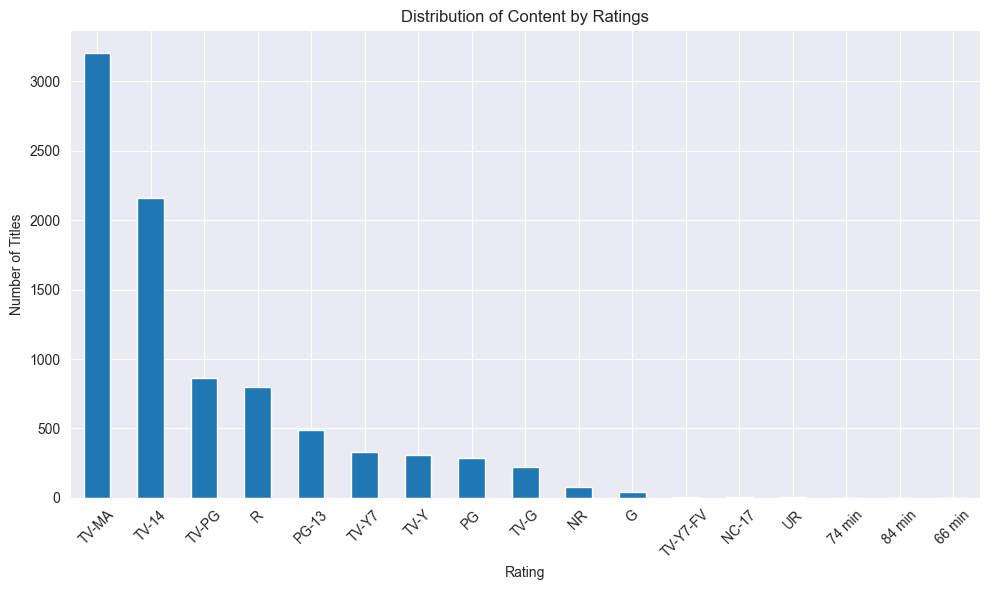

Distribution of content by ratings:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_data = pd.read_csv('netflix_dataset.csv')

ratings_distribution = netflix_data['rating'].value_counts()

plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar')
plt.title('Distribution of Content by Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Distribution of content by ratings:")
print(ratings_distribution)


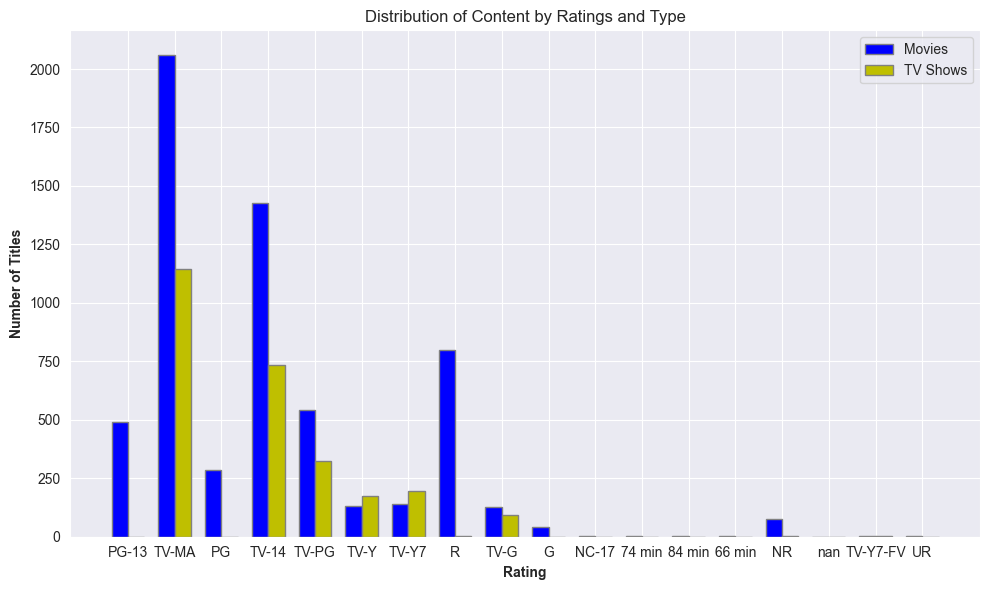

Distribution of movies by ratings:
PG-13: 490
TV-MA: 2062
PG: 287
TV-14: 1427
TV-PG: 540
TV-Y: 131
TV-Y7: 139
R: 797
TV-G: 126
G: 41
NC-17: 3
74 min: 1
84 min: 1
66 min: 1
NR: 75
nan: 0
TV-Y7-FV: 5
UR: 3

Distribution of TV shows by ratings:
PG-13: 0
TV-MA: 1145
PG: 0
TV-14: 733
TV-PG: 323
TV-Y: 176
TV-Y7: 195
R: 2
TV-G: 94
G: 0
NC-17: 0
74 min: 0
84 min: 0
66 min: 0
NR: 5
nan: 0
TV-Y7-FV: 1
UR: 0


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

netflix_data = pd.read_csv('netflix_dataset.csv')

movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

rating_categories = netflix_data['rating'].unique()

movies_counts = []
tv_shows_counts = []

for rating in rating_categories:
    # Count movies and TV shows for each rating category
    movies_counts.append(movies[movies['rating'] == rating].shape[0])
    tv_shows_counts.append(tv_shows[tv_shows['rating'] == rating].shape[0])

bar_width = 0.35

r1 = np.arange(len(rating_categories))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, movies_counts, color='b', width=bar_width, edgecolor='grey', label='Movies')
plt.bar(r2, tv_shows_counts, color='y', width=bar_width, edgecolor='grey', label='TV Shows')

plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Number of Titles', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(rating_categories))], rating_categories)
plt.title('Distribution of Content by Ratings and Type')

plt.legend()

plt.tight_layout()
plt.show()

print("Distribution of movies by ratings:")
for rating, count in zip(rating_categories, movies_counts):
    print(f"{rating}: {count}")

print("\nDistribution of TV shows by ratings:")
for rating, count in zip(rating_categories, tv_shows_counts):
    print(f"{rating}: {count}")

### Patterns:
- TV-MA rating has the most content (3207). 74, 84 and 66 min ratings have the least content.
- There are no TV shows with PG-13, PG, G, NC-17, UR, 74, 84 and 66 min ratings unlike movies.
- None of the content has nan rating
- Most movies and most TV shows both have higher distributions at TV-MA, TV-14 ratings

### Insights:
- Netflix rating system is based on both user ratings and viewing history. Most of Netflix content is designed for mature audience or is advised to be watched under parental guidence making Netflix not a childish platform even close.
- Only around 650 (647 exactly) pieces of content are TV-Y-rated.

## Build the correlation between the entry's Rating & Country (where the entry was produced)

Argentina: NR: 2; PG: 1; R: 1; TV-14: 10; TV-G: 2; TV-MA: 55; TV-PG: 3; TV-Y: 2
Australia: NR: 2; PG: 7; PG-13: 3; R: 10; TV-14: 15; TV-G: 6; TV-MA: 41; TV-PG: 17; TV-Y: 11; TV-Y7: 4
Brazil: NR: 2; PG: 2; PG-13: 1; R: 1; TV-14: 11; TV-G: 3; TV-MA: 54; TV-PG: 7; TV-Y: 3
Canada: G: 2; NC-17: 1; NR: 4; PG: 12; PG-13: 7; R: 37; TV-14: 38; TV-G: 15; TV-MA: 87; TV-PG: 27; TV-Y: 22; TV-Y7: 18; TV-Y7-FV: 1
China: NR: 2; PG: 3; PG-13: 4; R: 3; TV-14: 47; TV-G: 3; TV-MA: 23; TV-PG: 10; TV-Y: 3; TV-Y7: 2
Colombia: TV-14: 14; TV-MA: 26
Denmark: NR: 2; PG-13: 1; R: 3; TV-14: 3; TV-G: 1; TV-MA: 16; TV-Y: 1; TV-Y7: 2; TV-Y7-FV: 1
Egypt: TV-14: 75; TV-G: 1; TV-MA: 30; TV-PG: 6
France: G: 1; NC-17: 1; NR: 1; PG: 9; PG-13: 8; R: 15; TV-14: 32; TV-G: 2; TV-MA: 114; TV-PG: 4; TV-Y: 15; TV-Y7: 9; UR: 1
Germany: G: 1; NR: 1; PG: 4; PG-13: 7; R: 13; TV-14: 15; TV-G: 4; TV-MA: 47; TV-PG: 7; TV-Y: 2; TV-Y7: 2
Hong Kong: NR: 1; PG: 2; PG-13: 2; R: 14; TV-14: 31; TV-MA: 25; TV-PG: 4
India: NR: 4; PG: 4; PG-13: 5

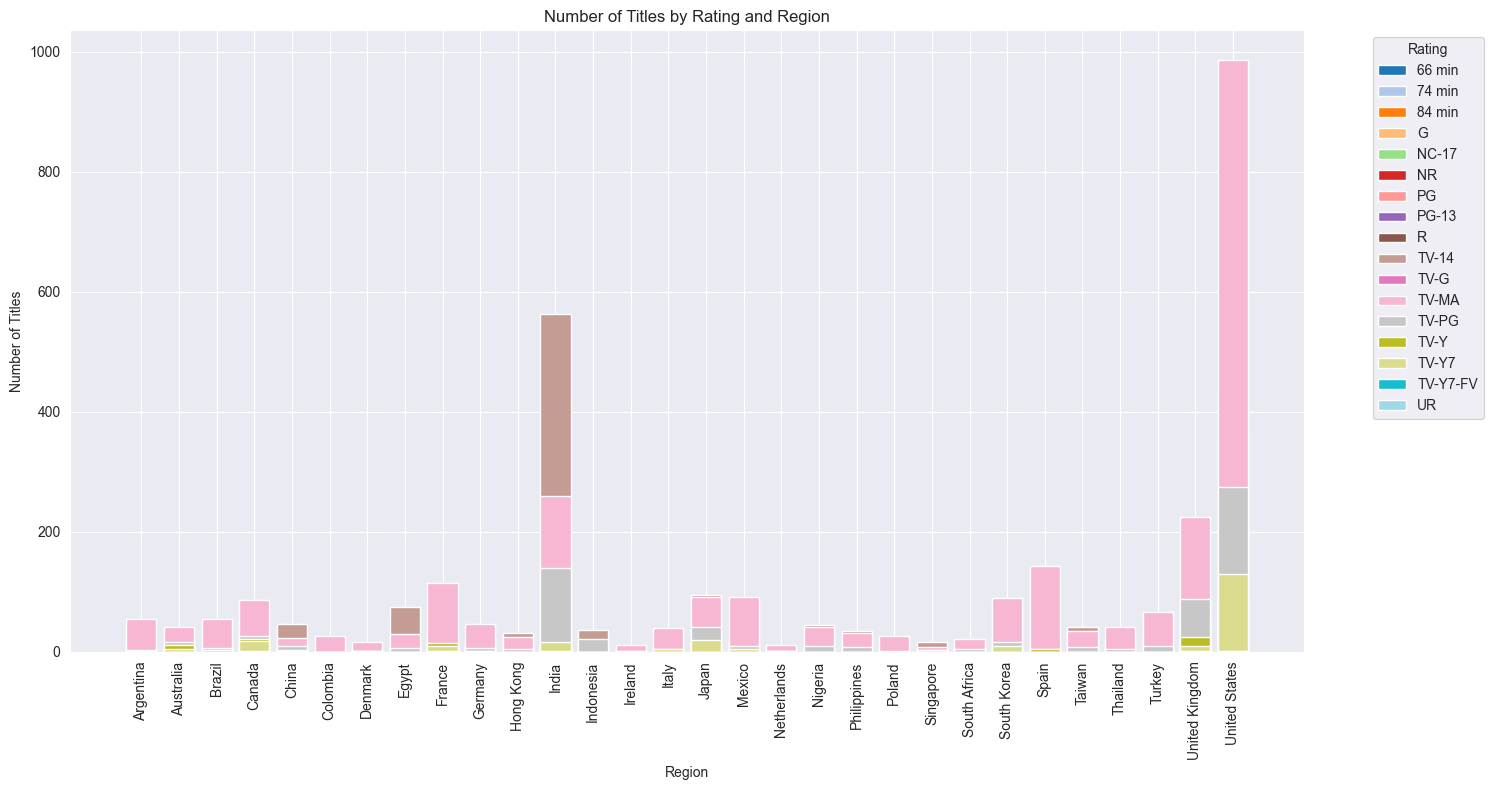

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

NUM_OF_COUNTRIES = 30

netflix_data = pd.read_csv('netflix_dataset.csv')
netflix_data.dropna(subset=['rating', 'country'], inplace=True)

netflix_data['region'] = netflix_data['country'].apply(lambda x: x.split(',')[0].strip())

top_countries = netflix_data['region'].value_counts().nlargest(NUM_OF_COUNTRIES).index

netflix_data = netflix_data[netflix_data['region'].isin(top_countries)]

unique_ratings = sorted(netflix_data['rating'].unique())

grouped_data = netflix_data.groupby(['region', 'rating']).size().unstack(fill_value=0)

num_ratings = len(unique_ratings)
cmap = plt.get_cmap('tab20', num_ratings)

plt.figure(figsize=(15, 8))

for i, rating in enumerate(unique_ratings):
    color = cmap(i)
    bars = plt.bar(grouped_data.index, grouped_data[rating], color=color, label=rating)

for region in grouped_data.index:
        ratings_counts = "; ".join([f"{rating}: {count}" for rating, count in grouped_data.loc[region].items() if count >= 1])
        print(f'{region}: {ratings_counts}')


plt.title('Number of Titles by Rating and Region')
plt.xlabel('Region')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)  # Rotate country labels for better readability
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Patterns:
- TV-MA rating is the most popular for each of the countries except for India and China where it takes only 260 and 23 accordinally.
- The most popular rating in India is TV-14 (563)
- The most popular rating in China is TV-14 (47)

### Insights:
- Such distribution suggests the difference between Asian countries and other parts of the world

## Duration Analysis: Calculate the average duration of movies.

In [20]:
import pandas as pd

netflix_df = pd.read_csv("netflix_dataset.csv")

movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()  # Make a copy to avoid modifying the original DataFrame

movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(float)

average_duration = movies_df['duration'].mean()

print(f"Average duration of movies: {average_duration:.2f} minutes")

Average duration of movies: 99.58 minutes


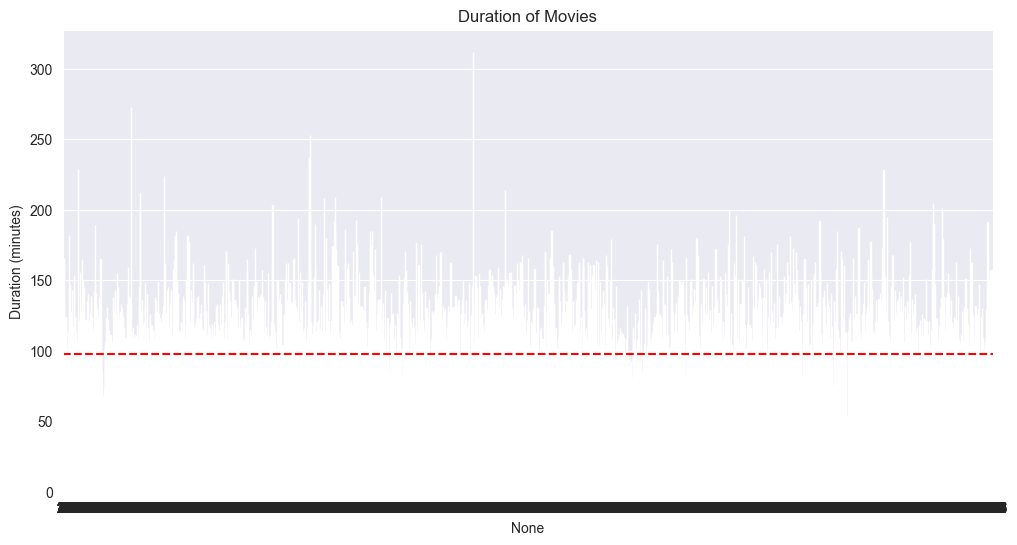

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

netflix_df = pd.read_csv("netflix_dataset.csv")

movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()  # Make a copy to avoid modifying the original DataFrame

movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(12, 6))
sns.barplot(x=movies_df.index, y='duration', data=movies_df, color='yellow')

median_duration = movies_df['duration'].median()
plt.axhline(y=median_duration, color='red', linestyle='--', label=f'Median Duration: {median_duration:.2f} min')

plt.title('Duration of Movies')
#plt.xlabel('Movie Index')
plt.ylabel('Duration (minutes)')

plt.show()

### Patterns:
- The average duration of movies equals to 99.58 minutes

### Insights:
- With all movies having different duration, 99.58 minutes is the average for all movies in the dataset provided for analysis

## Analyze the distribution of TV shows by the number of seasons

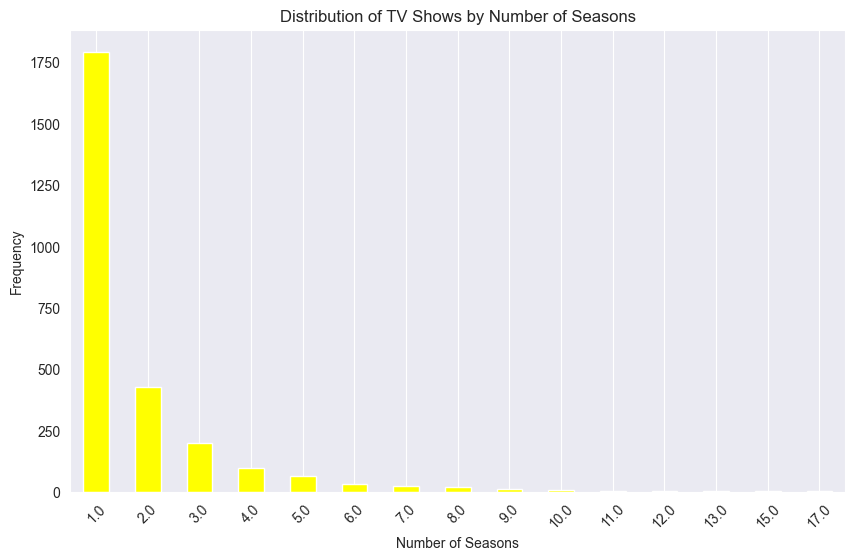

Frequency of TV Shows by Number of Seasons:
num_seasons
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
11.0       2
12.0       2
13.0       3
15.0       2
17.0       1
Name: count, dtype: int64


In [25]:
netflix_df = pd.read_csv("netflix_dataset.csv")

tv_shows_df = netflix_df[
    netflix_df['type'] == 'TV Show'].copy()  # Make a copy to avoid modifying the original DataFrame

tv_shows_df.loc[:, 'num_seasons'] = tv_shows_df['duration'].str.split().str[0].astype(float)

seasons_distribution = tv_shows_df['num_seasons'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
seasons_distribution.plot(kind='bar', color='yellow')
plt.title('Distribution of TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("Frequency of TV Shows by Number of Seasons:")
print(seasons_distribution)



### Patterns:
- Most TV Shows (1793) have 1 season. More than four times less TV shows (425) have 2 seasons and more than 9 times less (199) have 3 seasons.
- The more seasons -- the less TV shows

### Insights:
- The falling number of TV shows with the growing number of seasons may be connected to a range of factors. Among them: the show was shutten down after the first season, the show lost financing, the show was initially designed to have not many seasons, the show lost their main cast and could not go on, the show did not find popularity among people

## Country-wise Content Analysis: Assess the volume of content produced by different countries.

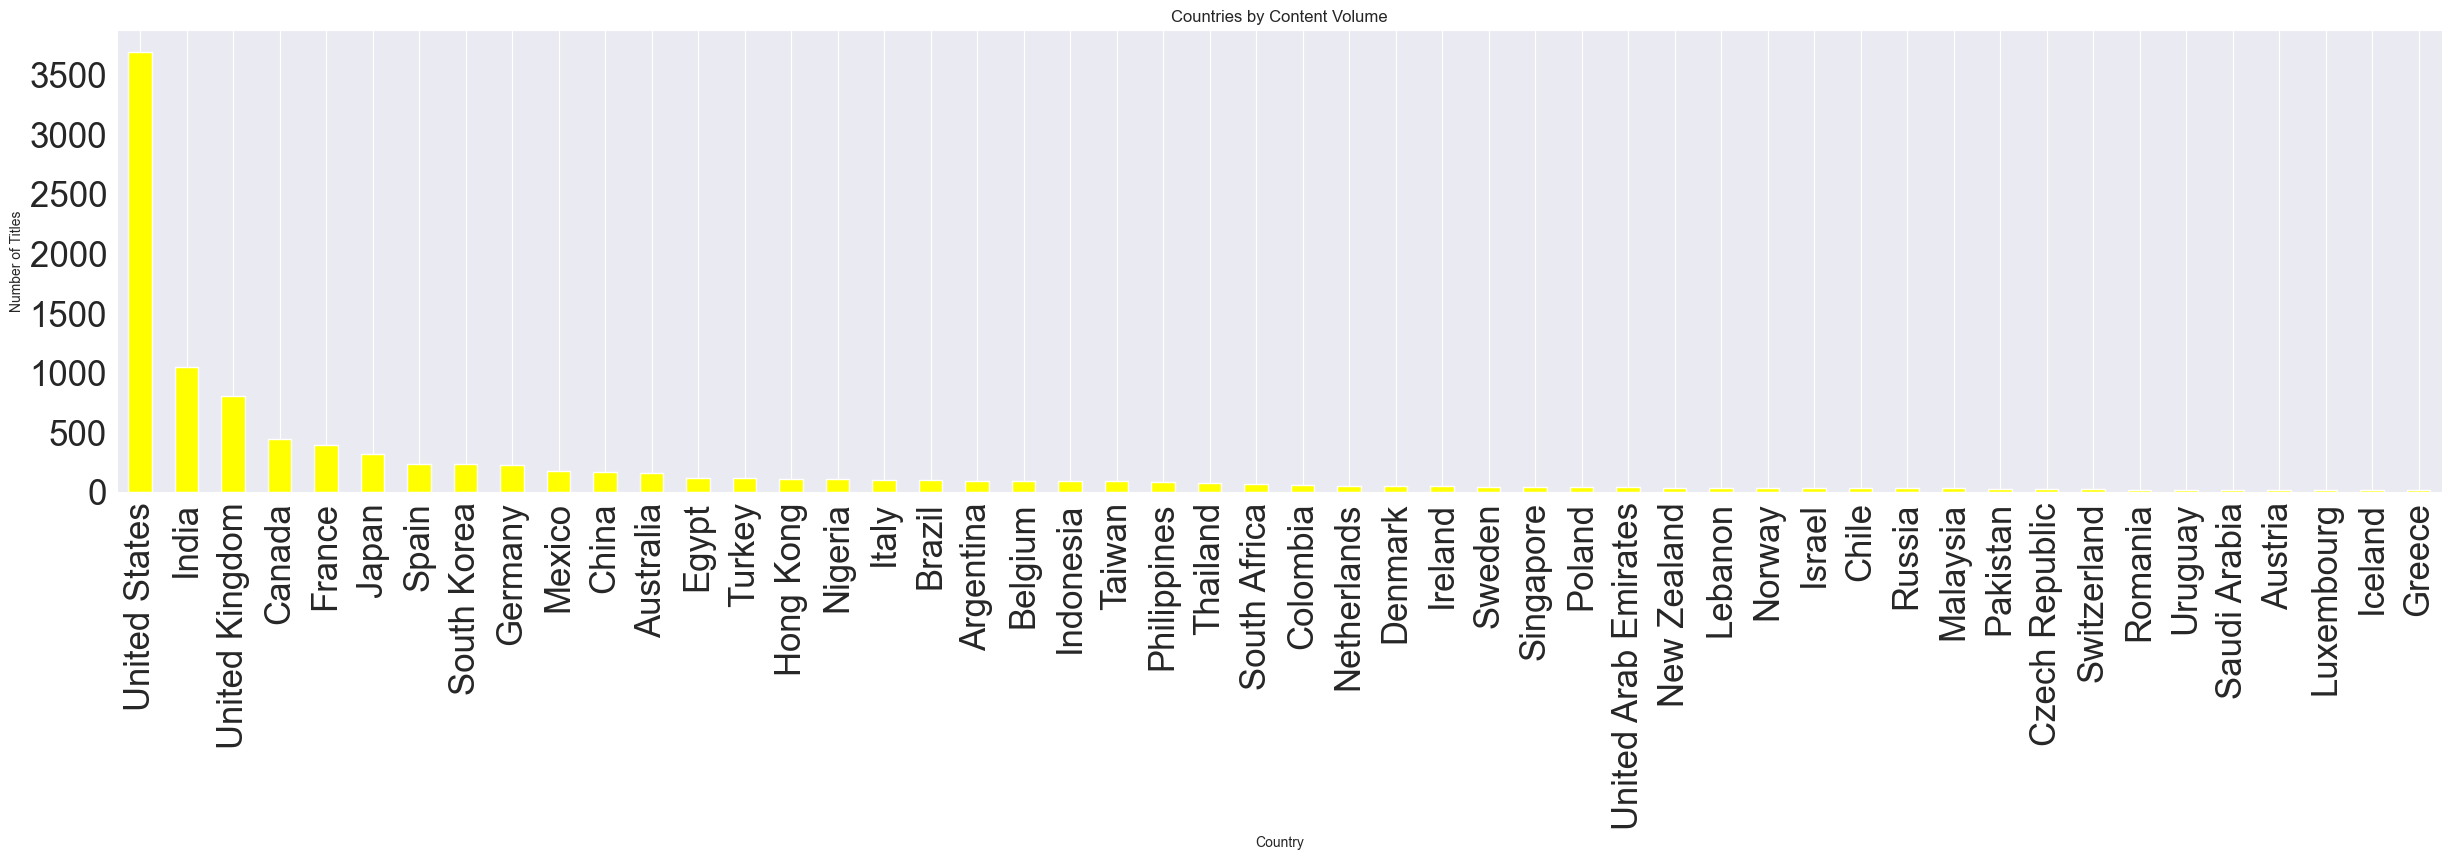

Top 50 Countries by Content Volume:
United States           3689
India                   1046
United Kingdom           804
Canada                   445
France                   393
Japan                    318
Spain                    232
South Korea              231
Germany                  226
Mexico                   169
China                    162
Australia                160
Egypt                    117
Turkey                   113
Hong Kong                105
Nigeria                  103
Italy                    100
Brazil                    97
Argentina                 91
Belgium                   90
Indonesia                 90
Taiwan                    89
Philippines               83
Thailand                  70
South Africa              62
Colombia                  52
Netherlands               50
Denmark                   48
Ireland                   46
Sweden                    42
Singapore                 41
Poland                    40
United Arab Emirates      37
New Zea

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

number_of_countries = 50

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

netflix_df['country_list'] = netflix_df['country'].str.split(', ')

all_countries = [country for sublist in netflix_df['country_list'].dropna() for country in sublist]

country_counts = pd.Series(all_countries).value_counts()

plt.figure(figsize=(30, 6))
country_counts[:number_of_countries].plot(kind='bar', color='yellow')
plt.title('Countries by Content Volume')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.yticks(fontsize=25)
plt.xticks(rotation=90, fontsize=25)
plt.grid(axis='y')
plt.show()

print("Top", number_of_countries, "Countries by Content Volume:")
print(country_counts[:number_of_countries])

### Patterns:
- The most content is produced by The US (3689), India (1046) and The UK (804). After them come Canada, some Asian and European countries.

### Insights:
- Such distribution may be caused by financing and the level of evolution of the industry in a country with The US obviously leading from these points.

## Director and Cast Analysis: Identify directors or cast members with the most titles on Netflix.

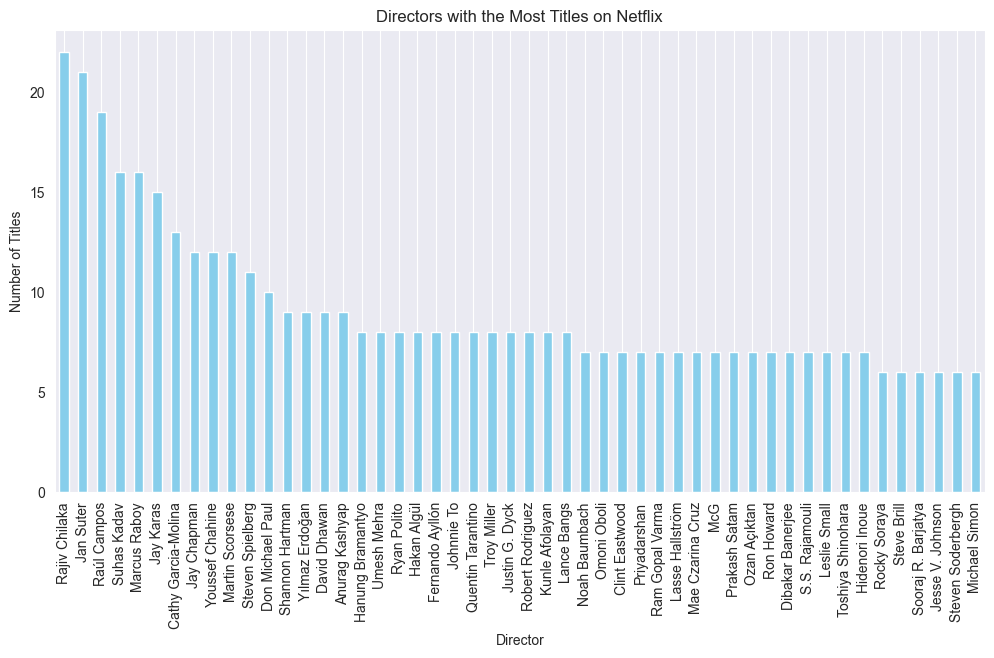

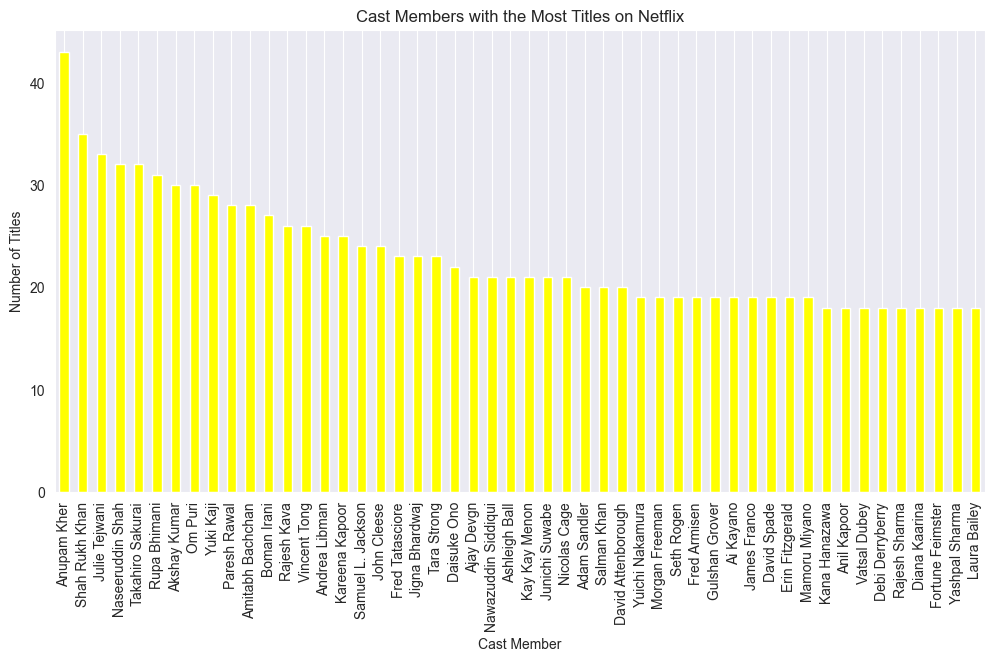

Top 50 Directors with the Most Titles on Netflix:
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       11
Don Michael Paul       10
Shannon Hartman         9
Yılmaz Erdoğan          9
David Dhawan            9
Anurag Kashyap          9
Hanung Bramantyo        8
Umesh Mehra             8
Ryan Polito             8
Hakan Algül             8
Fernando Ayllón         8
Johnnie To              8
Quentin Tarantino       8
Troy Miller             8
Justin G. Dyck          8
Robert Rodriguez        8
Kunle Afolayan          8
Lance Bangs             8
Noah Baumbach           7
Omoni Oboli             7
Clint Eastwood          7
Priyadarshan            7
Ram Gopal Varma         7
Lasse Hallström         7
Mae Czarina Cruz        7
McG                     7
Prakash Satam 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

num_of_directors = 50
num_of_actors = 50

netflix_df = pd.read_csv("netflix_dataset.csv")

netflix_df['director_list'] = netflix_df['director'].str.split(', ')
netflix_df['cast_list'] = netflix_df['cast'].str.split(', ')

all_directors = [director for sublist in netflix_df['director_list'].dropna() for director in sublist]
all_cast = [cast for sublist in netflix_df['cast_list'].dropna() for cast in sublist]

director_counts = pd.Series(all_directors).value_counts()
cast_counts = pd.Series(all_cast).value_counts()

plt.figure(figsize=(12, 6))
director_counts[:num_of_directors].plot(kind='bar', color='skyblue')
plt.title('Directors with the Most Titles on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
cast_counts[:num_of_actors].plot(kind='bar', color='yellow')
plt.title('Cast Members with the Most Titles on Netflix')
plt.xlabel('Cast Member')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

print("Top", num_of_directors, "Directors with the Most Titles on Netflix:")
print(director_counts.head(num_of_directors))

print("\nTop", num_of_actors, "Cast Members with the Most Titles on Netflix:")
print(cast_counts.head(num_of_actors))


### Patterns:
- None of the directors has over 22 mentions with Rajiv Chilaka leading the list. The least mentions is 8 obtained by 4 directors.
- Meanwhile those directors who have the most mentions are not the most famous ones with Steven Spielberg for example having only 11 mentions which is twice less than Rajiv Chilaka

### Insights:
- As there is no proportion between number of mentions and popularity it is possible to assume that the directors and actors who have been mentioned the most are not guaranteed to be the most talented but rather to be casted a lot

## Map collaboration networks among actors and directors(actors -> directors).

Directors collaborated with Anupam Kher (29 directors):
Sachin Yardi
Sangeeth Sivan
David Dhawan
David O. Russell
Indra Kumar
Neeraj Pandey
Sooraj R. Barjatya
Ashok Nanda
Punit Malhotra
Mahesh Bhatt
Karan Johar
Abhinay Deo
Satyajit Bhatkal
Ayaan Mukherji
Shivam Nair
Shree Narayan Singh
Rakeysh Omprakash Mehra
Amol Palekar
Ketan Mehta
Mark Williams
Satish Kaushik
Shirish Kunder
Subhash Ghai
Dibakar Banerjee
Kundan Shah
Amaan Khan
Santosh Sivan
Abhishek Sharma
N. Chandra


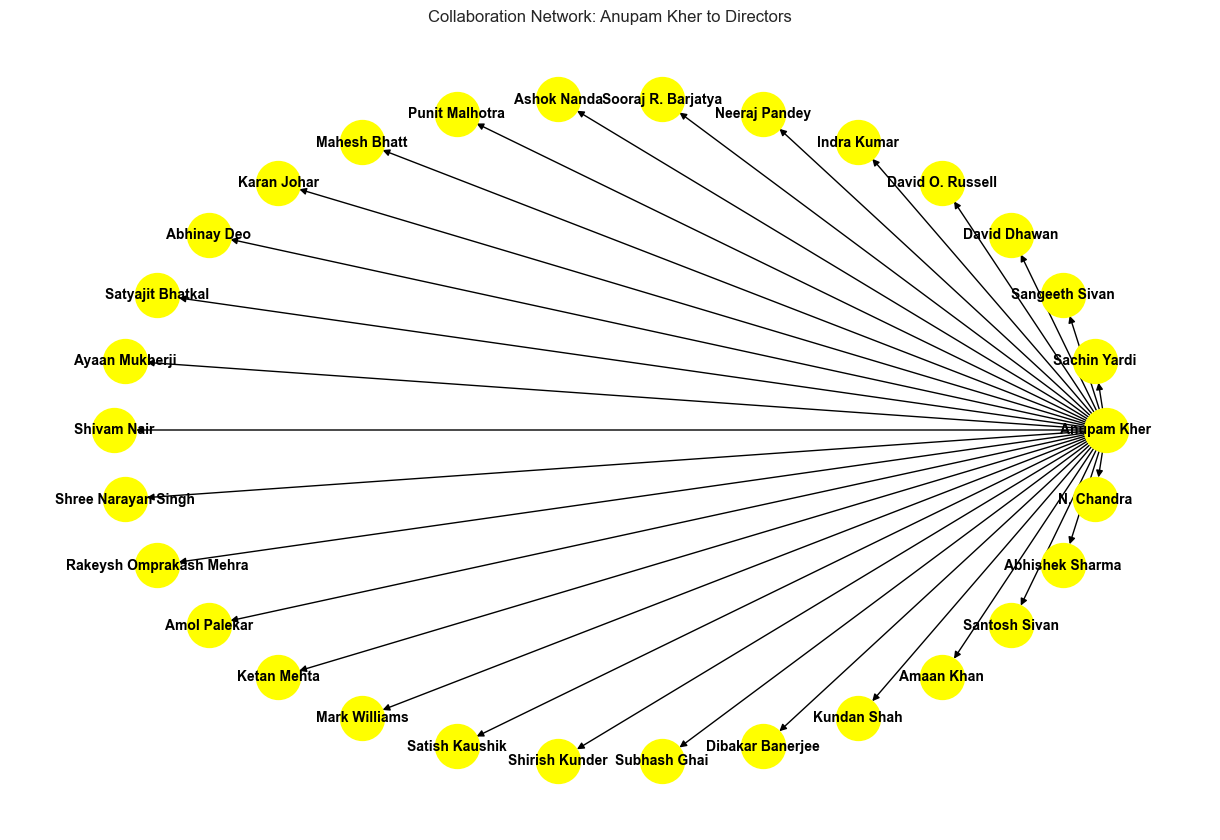

Directors collaborated with Anupam Kher:
Sachin Yardi
Sangeeth Sivan
David Dhawan
David O. Russell
Indra Kumar
Neeraj Pandey
Sooraj R. Barjatya
Ashok Nanda
Punit Malhotra
Mahesh Bhatt
Karan Johar
Abhinay Deo
Satyajit Bhatkal
Ayaan Mukherji
Shivam Nair
Shree Narayan Singh
Rakeysh Omprakash Mehra
Amol Palekar
Ketan Mehta
Mark Williams
Satish Kaushik
Shirish Kunder
Subhash Ghai
Dibakar Banerjee
Kundan Shah
Amaan Khan
Santosh Sivan
Abhishek Sharma
N. Chandra


In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

netflix_data = pd.read_csv('netflix_dataset.csv')

netflix_data['actors'] = netflix_data['cast'].str.split(', ')

actor_name = 'Anupam Kher'

actor_data = netflix_data[netflix_data['actors'].apply(lambda x: actor_name in x if isinstance(x, list) else False)]

directors = actor_data['director'].dropna().unique()  # Exclude NaN directors

G = nx.DiGraph()

num_directors = len(directors)

print(f"Directors collaborated with {actor_name} ({num_directors} directors):")
for director in directors:
    print(director)

for director in directors:
    G.add_edge(actor_name, director)

plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='yellow', font_size=10, font_weight='bold')
plt.title(f"Collaboration Network: {actor_name} to Directors")
plt.show()


### Patterns:
- Anapam Kher has a lot of connections with different directors (29)

### Insights:
- As Anapam Kher is the most popular actor on Netflix (we fount it out in previous analysis) it is natural he has this many contacts with various directors

## Genre Analysis: Determine the most popular genres on Netflix.

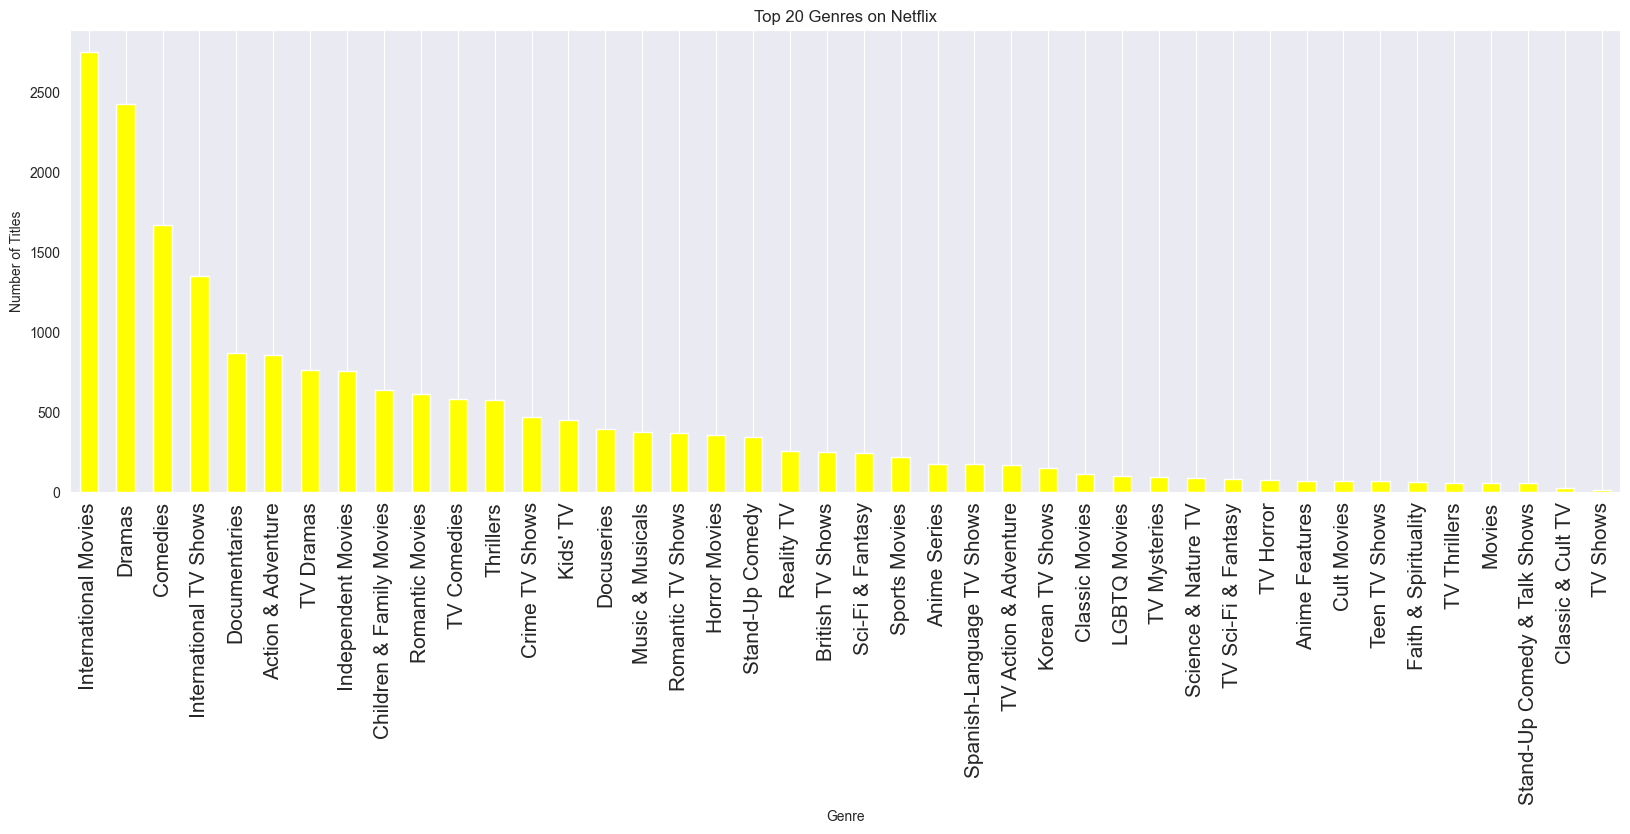

Number of titles for each genre:
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korea

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_df = pd.read_csv("netflix_dataset.csv")

netflix_df['genre_list'] = netflix_df['listed_in'].str.split(', ')

all_genres = [genre for sublist in netflix_df['genre_list'].dropna() for genre in sublist]

genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(20, 6))
genre_counts[:50].plot(kind='bar', color='yellow')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90, fontsize=15)
plt.grid(axis='y')
plt.show()

print("Number of titles for each genre:")
print(genre_counts)


### Patterns:
- The most popular genres on Netflix are International Movies (2752), Dramas (2427), Comedies (1674), International TV shows (1351). The least popular are Classic and Cult TV (28) and simple TV shows (16).

### Insights:
- People seem to enjoy more classical generes like International Movies, Dramas, Comedies, Action movies. This may be caused by the fact that people are used to these genres, finding it comfortable to dive into the movie they kinda know what to expect from one.

## Investigate trends in genre popularity over time.

Genre: Documentaries, Release Year: 2021.0, Number of Titles: 1
Genre: International TV Shows, Release Year: 2021.0, Number of Titles: 1
Genre: TV Dramas, Release Year: 2021.0, Number of Titles: 1
Genre: TV Mysteries, Release Year: 2021.0, Number of Titles: 1
Genre: Crime TV Shows, Release Year: 2021.0, Number of Titles: 1
Genre: International TV Shows, Release Year: 2021.0, Number of Titles: 2
Genre: TV Action & Adventure, Release Year: 2021.0, Number of Titles: 1
Genre: Docuseries, Release Year: 2021.0, Number of Titles: 1
Genre: Reality TV, Release Year: 2021.0, Number of Titles: 1
Genre: International TV Shows, Release Year: 2021.0, Number of Titles: 3
Genre: Romantic TV Shows, Release Year: 2021.0, Number of Titles: 1
Genre: TV Comedies, Release Year: 2021.0, Number of Titles: 1
Genre: TV Dramas, Release Year: 2021.0, Number of Titles: 2
Genre: TV Horror, Release Year: 2021.0, Number of Titles: 1
Genre: TV Mysteries, Release Year: 2021.0, Number of Titles: 2
Genre: Children & Fami

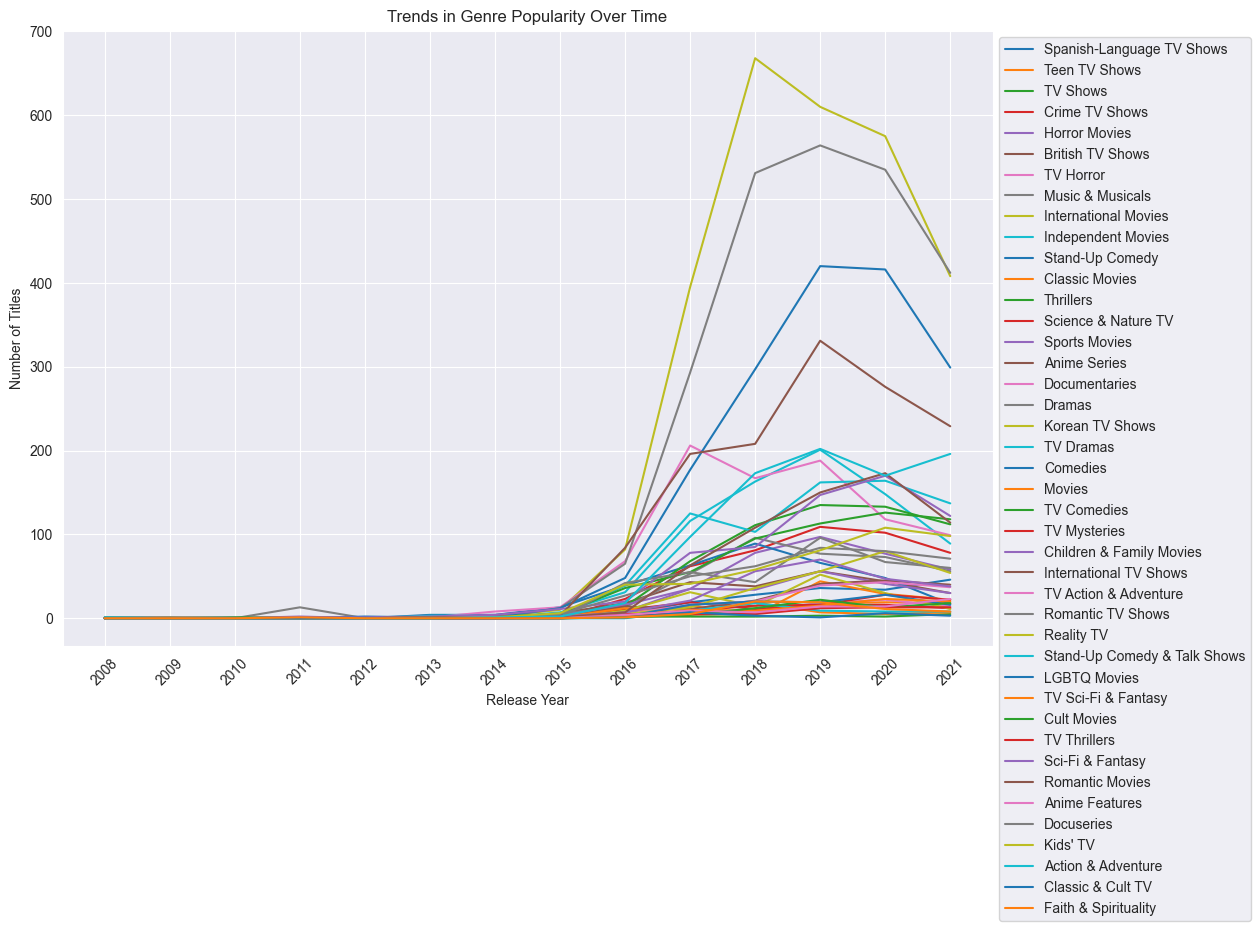

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

netflix_df = pd.read_csv("netflix_dataset.csv")

netflix_df['release_year'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce').dt.year

netflix_df['genre_list'] = netflix_df['listed_in'].str.split(', ')

all_genres = [genre for sublist in netflix_df['genre_list'].dropna() for genre in sublist]

unique_genres = list(set(all_genres))

genre_counts_by_year = pd.DataFrame(index=unique_genres, columns=range(2008, 2022)).fillna(0)

for index, row in netflix_df.iterrows():
    if not pd.isna(row['release_year']):  # Check NaN in release_year
        for genre in row['genre_list']:
            genre_counts_by_year.loc[genre, row['release_year']] += 1
            print(
                f"Genre: {genre}, Release Year: {row['release_year']}, Number of Titles: {genre_counts_by_year.loc[genre, row['release_year']]}")

plt.figure(figsize=(12, 8))
for genre in genre_counts_by_year.index:
    plt.plot(genre_counts_by_year.loc[genre], label=genre)
plt.title('Trends in Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(range(2008, 2022), rotation=45)
plt.show()

### Patterns:
- International movies were the most popular throughout mostly all time hitting pick in 2018 (~668).
- Most of the movie-genres have relatively smooth trending line troughout years varying up to ~100-150 titles mentioned.
- Most genres have falling numbers after ~2020 and some even earlier

### Insights:
- These patterns may signalise about people choosing the genres they are mostly used to personally (give or take). 
- The pick in 2018 of International movies and the ongoing fall may be caused by less production of high-quality content of the genre and though people choosing it less.
- The 2020 massive fall may be explained by Covid times

## Textual Analysis of Titles and Descriptions: Discover common keywords in titles and descriptions.

Most common keywords in titles and descriptions:
[('life', 850), ('young', 741), ('new', 739), ('love', 667), ('family', 606), ('man', 572), ('world', 561), ('two', 522), ('friends', 494), ('she', 481), ('woman', 467), ('series', 415), ('one', 409), ('must', 400), ('while', 378), ('documentary', 364), ('find', 343), ('school', 342), ('home', 329), ('finds', 313), ('where', 306), ('three', 299), ('help', 294), ('lives', 287), ('all', 286), ('takes', 280), ('own', 277), ('years', 274), ('girl', 265), ('group', 263), ('back', 260), ('high', 259), ('more', 255), ('story', 251), ('father', 249), ('take', 249), ('city', 239), ('special', 230), ('through', 228), ('true', 227), ('war', 226), ('get', 226), ('save', 226), ('time', 216), ('other', 216), ('over', 215), ('murder', 215), ('team', 213), ('show', 213), ('teen', 212), ('against', 211), ('down', 207), ('four', 206), ('daughter', 206), ('death', 204), ('have', 204), ('becomes', 202), ('between', 202), ('son', 199), ('comedy', 191), ('pas

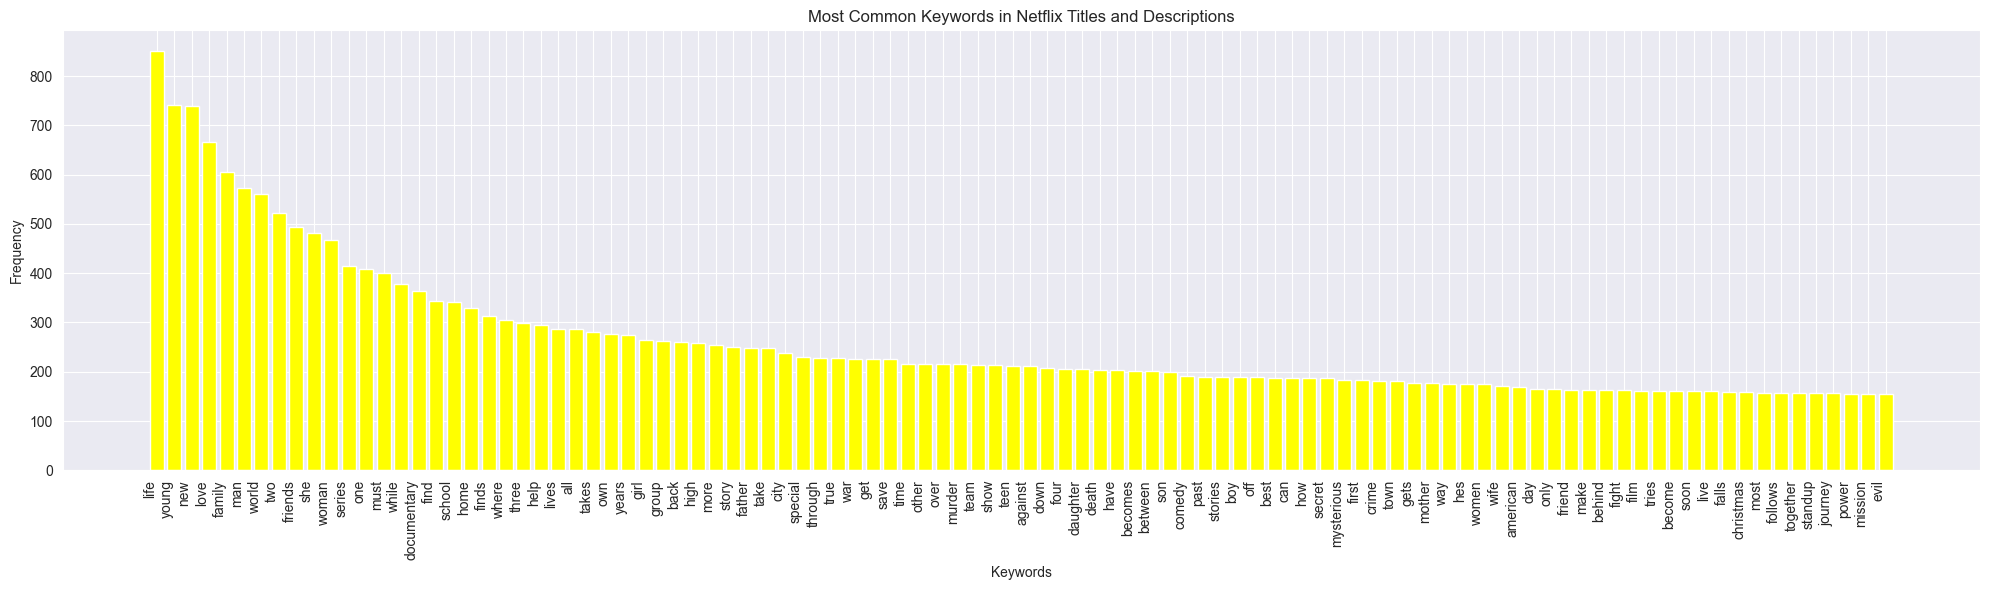

In [29]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

WORDS_NUM = 100
netflix_data = pd.read_csv("netflix_dataset.csv")

netflix_data['text'] = netflix_data['title'] + ' ' + netflix_data['description']

netflix_data['text'] = netflix_data['text'].str.lower()

netflix_data['text'] = netflix_data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

words = ' '.join(netflix_data['text']).split()

stopwords = set(
    ['the', 'is', 'and', 'a', 'an', 'to', 'of', 'in', 'with', 'his', 'her', 'for', 'on', 'their', 'when', 'this',
     'from', 'as', 'out', 'by', 'after', 'he', 'that', 'who', 'but', 'at', 'they', 'into', 'up', 'out', 'him', 'its', 'be', 'it', 'them', 'about', 'has', 'are'])
words = [word for word in words if word not in stopwords]

word_freq = Counter(words)

print("Most common keywords in titles and descriptions:")
print(word_freq.most_common(WORDS_NUM))

common_keywords = [word[0] for word in word_freq.most_common(WORDS_NUM)]
common_keywords_freq = [word[1] for word in word_freq.most_common(WORDS_NUM)]

plt.figure(figsize=(20, 6))
plt.bar(common_keywords, common_keywords_freq, color='yellow')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Most Common Keywords in Netflix Titles and Descriptions')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### Patterns:
- Except for the words in stopwords set that are articles, pronouns and other linking words the most popular are words like "life" (850), "young" (741), "new" (739), "love" (667), "family" (606). 

### Insights:
- I would say that all the most popular words have rather positive vibe.
- I have also noticed the fact that the word "man" (572) is met more often than the word "woman" (467)

## Split content by seasons (summer, winter...) and build a chat to show when more entries were produced. Use a bar chart to visualize

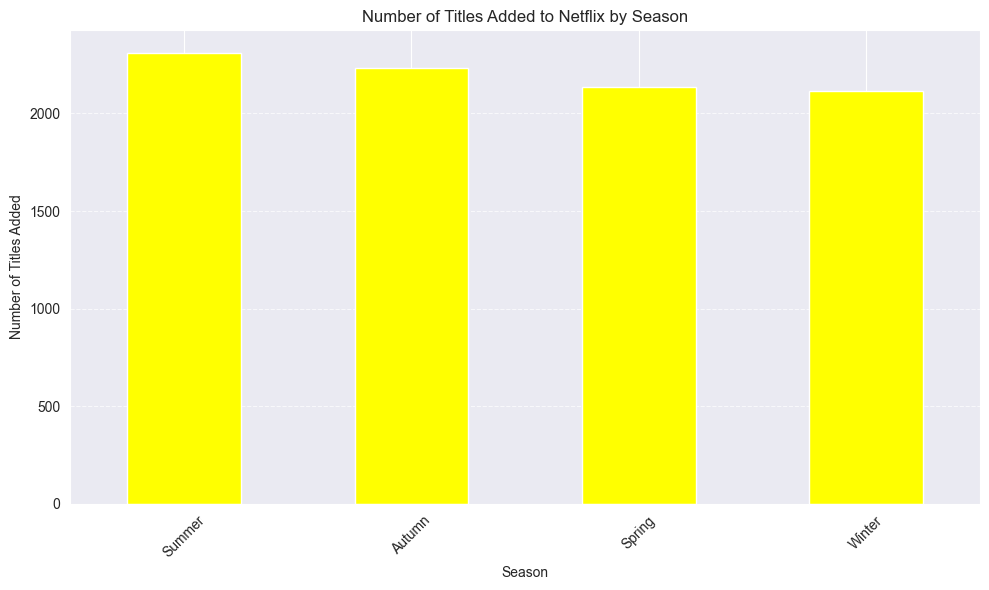

Number of Titles Added to Netflix by Season:
Summer: 2310
Autumn: 2235
Spring: 2138
Winter: 2114


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_data = pd.read_csv("netflix_dataset.csv")

netflix_data['date_added'] = netflix_data['date_added'].str.strip()

netflix_data['month_added'] = pd.to_datetime(netflix_data['date_added']).dt.month

# Define seasons
seasons = {
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11],
    'Winter': [12, 1, 2]
}

def get_season(month):
    for season, months in seasons.items():
        if month in months:
            return season


netflix_data['season'] = netflix_data['month_added'].apply(get_season)

season_counts = netflix_data['season'].value_counts()

plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color='yellow')
plt.title('Number of Titles Added to Netflix by Season')
plt.xlabel('Season')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Number of Titles Added to Netflix by Season:")
for season, count in season_counts.items():
    print(f"{season}: {count}")

### Patterns:
- The most content was released in summer (2310) and autumn (2235) period while the least in spring (2138) and winter (2114)

### Insights:
- As most content was released in summer it is possible to assume that it is due to the fact that people tend to have more free time for watching movies and TV shows in summer so it is more profitable to release content in summer

## Analyze trends in the growth of Netflix’s library over time. Use a bar chart where x - years, y - genres, and the number of files in that genre.

Genre Counts by Year:
genre_list    Action & Adventure  Anime Features  Anime Series  \
release_year                                                     
2008                           0               0             0   
2009                           0               0             0   
2010                           0               0             0   
2011                           0               0             0   
2012                           0               0             0   
2013                           0               0             0   
2014                           1               0             0   
2015                           2               0             0   
2016                          18               4            14   
2017                          97               9            11   
2018                         173               7            22   
2019                         202              14            42   
2020                         170              14      

<Figure size 1600x1000 with 0 Axes>

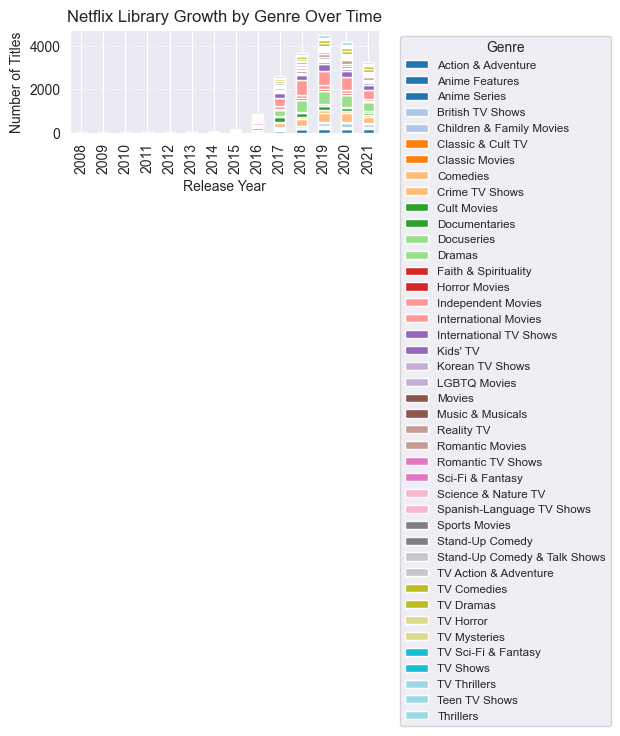

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import re

netflix_df = pd.read_csv("netflix_dataset.csv")

netflix_df['date_added'] = netflix_df['date_added'].fillna('')

netflix_df['date_added'] = netflix_df['date_added'].apply(lambda x: re.sub(r"^\s+|\s+$", "", str(x)))

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce')

netflix_df.dropna(subset=['date_added'], inplace=True)

netflix_df['release_year'] = netflix_df['date_added'].dt.year
netflix_df['genre_list'] = netflix_df['listed_in'].str.split(', ')

netflix_df_exploded = netflix_df.explode('genre_list')

# Group by release year and genre, then count the number of files in each category
genre_counts_by_year = netflix_df_exploded.groupby(['release_year', 'genre_list']).size().unstack(fill_value=0)

total_titles_by_year = netflix_df.groupby('release_year').size()

print("Genre Counts by Year:")
print(genre_counts_by_year)
print("\nTotal Number of Titles by Year:")
print(total_titles_by_year)

# Plotting
plt.figure(figsize=(16, 10)) 
colors = plt.cm.tab20.colors  # Choosing a colormap with distinct colors

bars = genre_counts_by_year.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Netflix Library Growth by Genre Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Reduced legend font size
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Patterns:
- There are the most releases after 2016 especially in 2019 (2016) where there is a pick
- International movies and dramas (2019 - 2020 the most) are the most popular genres throughout the years

### Insights:
- As we have already analyzed the most popular genres without connection to years we now observe the same distribution of most popular genres stays the same even throughout the years. This leads us to the conclusion that such distribution was caused by gradual superiority of each genre and not its sudden growth at some particular time

## Correlation Analysis: Explore correlations between the duration of shows/movies and their ratings. Use 2 charts (one for movies and one for series). As a visualization chart, use heat maps (seaborn lib). Group durations for movies, ex. 50-60 mins, 61 - 70 mins etc


Correlation between TV Show Duration and Ratings:
rating            NR         R     TV-14      TV-G     TV-MA     TV-PG  \
duration                                                                 
1 Season    0.001675  0.001117  0.298157  0.031826  0.431044  0.133445   
10 Seasons       NaN       NaN  0.142857       NaN  0.428571  0.142857   
11 Seasons       NaN       NaN       NaN       NaN       NaN  1.000000   
12 Seasons       NaN       NaN  0.500000       NaN  0.500000       NaN   
13 Seasons  0.333333       NaN  0.333333       NaN  0.333333       NaN   
15 Seasons       NaN       NaN  1.000000       NaN       NaN       NaN   
17 Seasons       NaN       NaN  1.000000       NaN       NaN       NaN   
2 Seasons        NaN       NaN  0.171765  0.035294  0.449412  0.082353   
3 Seasons   0.005025       NaN  0.180905  0.055276  0.477387  0.105528   
4 Seasons        NaN       NaN  0.284211  0.063158  0.326316  0.073684   
5 Seasons        NaN       NaN  0.307692  0.030769  0.384615 

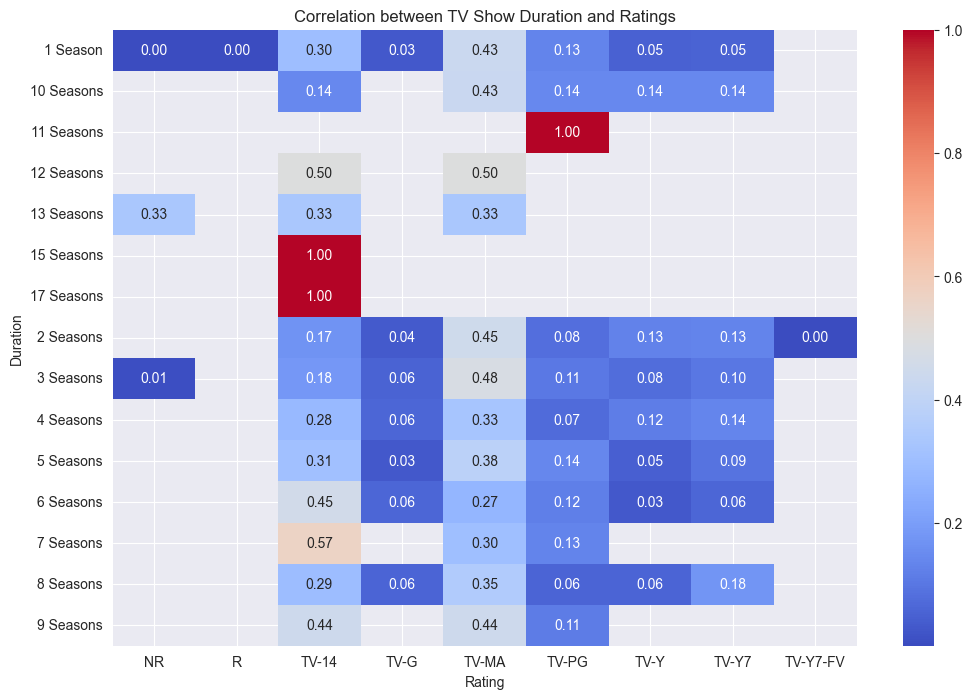

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
netflix_data = pd.read_csv('netflix_dataset.csv')

tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']

tv_shows_correlation = tv_shows_data.groupby('duration')['rating'].value_counts(normalize=True).unstack()

print("\nCorrelation between TV Show Duration and Ratings:")
print(tv_shows_correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(tv_shows_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between TV Show Duration and Ratings')
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.show()

### Patterns:
- There are a lot of TV-shows at TV-MA and TV-14 ratings.
- The highest number of TV-shows with different ratings have the duration of around 1-6 seasons

### Insights:
- These patterns suggest that Netflix focuses on rather mature content and does not prefer to finance very long shows

<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\alina\AppData\Local\Temp\ipykernel_10860\60167982.py:16: SyntaxWarning: invalid escape sequence '\d'
  duration_rating_data['duration'] = duration_rating_data['duration'].str.extract('(\d+)').astype(float)
C:\Users\alina\AppData\Local\Temp\ipykernel_10860\60167982.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_rating_data['duration'] = duration_rating_data['duration'].str.extract('(\d+)').astype(float)
C:\Users\alina\AppData\Local\Temp\ipykernel_10860\60167982.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in 

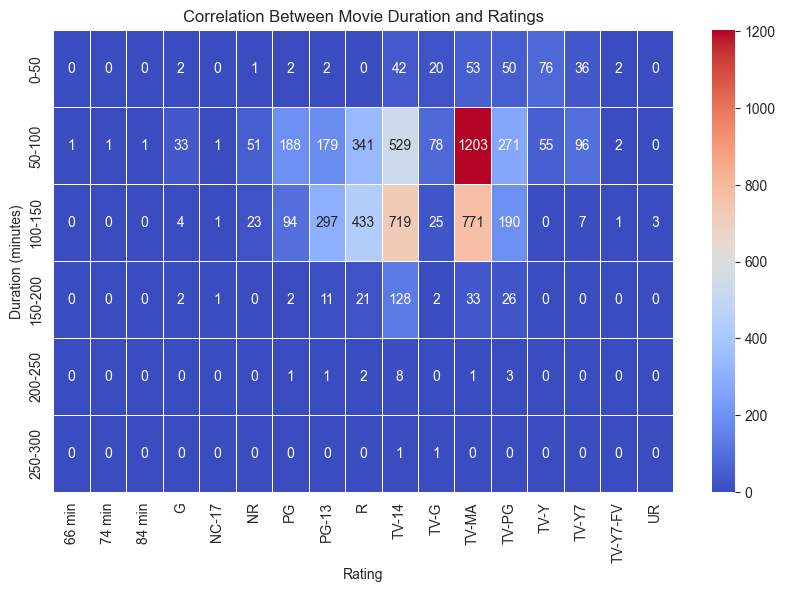

Main data:
      duration rating duration_bins
0         90.0  PG-13        50-100
6         91.0     PG        50-100
7        125.0  TV-MA       100-150
9        104.0  PG-13       100-150
12       127.0  TV-MA       100-150
...        ...    ...           ...
8801      96.0  TV-MA        50-100
8802     158.0      R       150-200
8804      88.0      R        50-100
8805      88.0     PG        50-100
8806     111.0  TV-14       100-150

[6131 rows x 3 columns]


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

netflix_data = pd.read_csv('netflix_dataset.csv')

movies_data = netflix_data[netflix_data['type'] == 'Movie']

duration_rating_data = movies_data[['duration', 'rating']]

duration_rating_data['duration'] = duration_rating_data['duration'].str.extract('(\d+)').astype(float)

median_duration = duration_rating_data['duration'].median()
duration_rating_data['duration'].fillna(median_duration, inplace=True)

bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300']
duration_rating_data['duration_bins'] = pd.cut(duration_rating_data['duration'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
heatmap_data = duration_rating_data.groupby(['duration_bins', 'rating']).size().unstack()
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5)
plt.title('Correlation Between Movie Duration and Ratings')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.show()

print("Main data:")
print(duration_rating_data)

### Patterns:
- The peak is at TV-MA rating and duration of 50-100 minutes (1203 movies). Then comes 771 movies at the same rating but duration of 100-150 minutes. And TV-14 rating at duration 100-150 minutes with 719 movies is the third largest number in this analysis.
- The least movies are at duration of 200-300 minutes corresponding to each of the ratings

### Insights:
- Looking at the current diagram and remembering the results from previous tasks it is possible to say that the there is no surprise exactly TV-MA 50-100minute movies are the most popular on Netflix as duration around ~80-90 minutes ia the most optimal for a movie and Netflix mostly has content for mature audience

## Investigate the relationship between the release year of content and its popularity or rating. Use release_year  & rating to build correlation

C:\Users\alina\AppData\Local\Temp\ipykernel_10860\481339392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release_rating_data.dropna(inplace=True)
C:\Users\alina\AppData\Local\Temp\ipykernel_10860\481339392.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release_rating_data['release_year'] = release_rating_data['release_year'].astype(int)


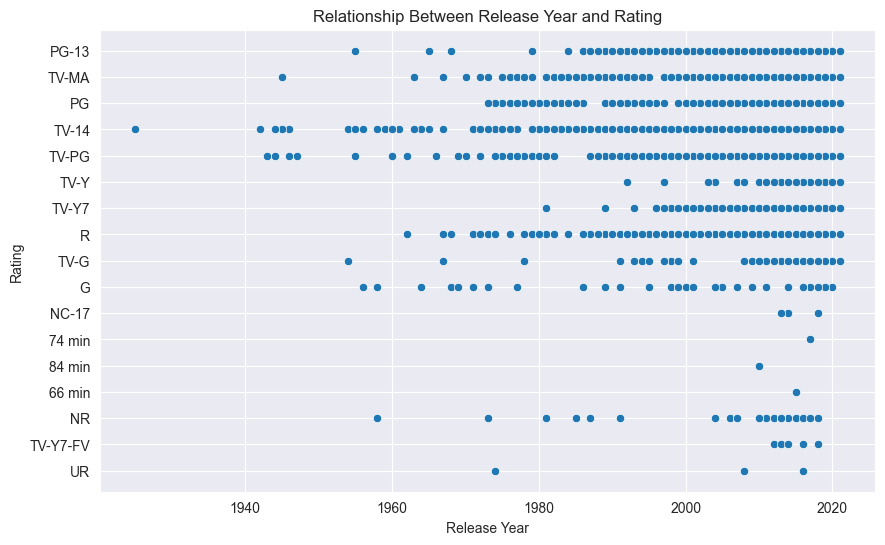

      release_year rating
0             2020  PG-13
1             2021  TV-MA
2             2021  TV-MA
3             2021  TV-MA
4             2021  TV-MA
...            ...    ...
8802          2007      R
8803          2018  TV-Y7
8804          2009      R
8805          2006     PG
8806          2015  TV-14

[8803 rows x 2 columns]


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

netflix_data = pd.read_csv('netflix_dataset.csv')

release_rating_data = netflix_data[['release_year', 'rating']]

release_rating_data.dropna(inplace=True)
release_rating_data['release_year'] = release_rating_data['release_year'].astype(int)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=release_rating_data, x='release_year', y='rating')
plt.title('Relationship Between Release Year and Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

print(release_rating_data)

### Patterns:
- There are a lot more movies released in the 21st century rather than in the 20th.
- The most movies are of mature content throughout the years

### Insights:
- These facts may indicate that Netflix has always been focused on mature audience more than on younger viewers.
- This also stays that Netflix has evolved a lot and started producing a lot more content in 21st century with the flow of new technology and finance in filmmaking